In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

In [74]:
def norm(x):
    xmin = min(x)
    xmax = max(x)
    return (x - xmin)/(xmax-xmin) if xmax > xmin else x**0

In [75]:
def h(x, w):
    return np.matmul(x, w.T)

In [76]:
def error(x, y, w):
    return (y.T - h(x, w))

In [77]:
def ridge(w, λ):
    return λ*((np.dot(w, w.T)))

In [78]:
def lasso(w, λ):
    return λ*sum(w)

In [79]:
def loss(y_pred, y, λ, ρ):
    e = y - y_pred
    print(y_pred)
    print(y)
    print(y-y_pred)
    
    return (np.dot(e, e))/(e.shape[0] * 2)
    return np.dot(err.T, err)/(err.shape[0] * 2) + ρ*lasso(w, λ) * (1-ρ)*ridge(w, λ)

In [80]:
def delta(x, y, Lambda, w):
    return (np.matmul(y - h(x, w), -x)/x.shape[0])
    return (np.matmul(err, -x)/err.shape[0]) + 2*Lambda*w

In [81]:
def update(w, dw, alpha):
    return w - alpha*dw

In [82]:
def make_matrix(x_vector, p):
    #Es mejor crear una lista y luego crear el numpy array
    rows = x_vector.shape[0]
    matrix = np.ones((rows,p+1))
    for i in range(rows):
        for j in range(p+1):
            matrix[i][j] = x_vector[i] ** j
    return matrix

In [83]:
def train(x, y, umbral, alpha, p, rho, Lambda):
    x = make_matrix(x, p)
    np.random.seed(2001)
    w = np.array([np.random.rand() for i in range(0, p + 1)])
    y_pred = h(x, w)
    print(w)
    L = loss(y_pred, y, Lambda, rho)

    for i in range(100000):
        dw = delta(x, y, Lambda, w)
        w = update(w, dw, alpha)
        y_pred = h(x, w)
        L = loss(y_pred, y, Lambda, rho)
        print(L)
    return w, L


[0.16712564 0.08099804 0.96022574 0.93845024 0.62085885 0.42560197
 0.68978129 0.24203462 0.36660064 0.14195103 0.21019224 0.90794452
 0.64405072 0.20727221 0.43596563 0.95635709 0.69778773 0.52989243
 0.58110074 0.33954328 0.81749589 0.08160132 0.65421571 0.64452427
 0.90425307 0.82497026 0.26373263 0.43155152 0.49897241 0.15030076
 0.40642355 0.05687411 0.64351347 0.65772245 0.06606537 0.64535942
 0.12120544 0.50294212 0.39197015 0.126939   0.07176717 0.33383596
 0.18428011 0.44096655 0.05445459 0.13637444 0.5306997  0.57374584
 0.11347885 0.74597657 0.54714756 0.86044832 0.94423934 0.2538128
 0.64532034 0.07810465 0.92411001 0.34257062 0.43106314 0.00549605
 0.43238372 0.51884914 0.03149656 0.55928029 0.31037094 0.61900023
 0.80995795 0.87940052 0.32024486 0.04387617 0.96843694 0.62244562
 0.1205572  0.89316456 0.57965848 0.10567209 0.23047339 0.9342516
 0.07415417 0.6734185  0.67228584 0.16816861 0.46787045 0.36897543
 0.74722767 0.4756306  0.80252633 0.0344292  0.85318848 0.128766

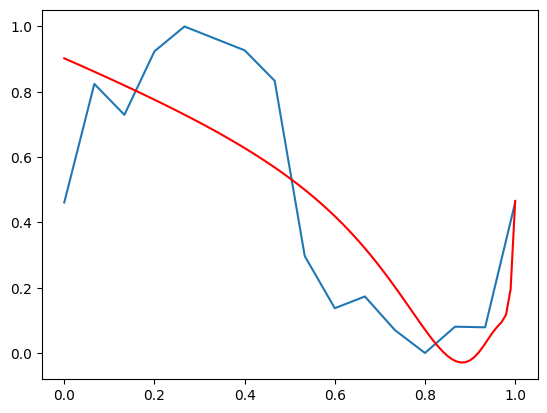

In [84]:
x_vals = np.arange(0,2*np.pi,0.4)
y_vals =  np.array([ np.sin(e + np.random.normal(0,0.2) ) for e  in x_vals])
data = pd.DataFrame({"x":x_vals, "y":y_vals})

x_vals = norm(x_vals)
y_vals = norm(y_vals)
plt.plot(x_vals, y_vals,'',)
upper_limit = max(x_vals)
lower_limit = min(x_vals)
w, L = train(x_vals, y_vals, umbral=0.0001, alpha=0.005, p=100, rho=0.5, Lambda=10000)
print(w)
w = w[::-1]
num_pts = 100
x = np.linspace(lower_limit, upper_limit, num_pts)
y = np.polyval(w, x)
plt.plot(x, y, '-r')